# Визуальный анализ данных c Pandas

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/38793/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)


object
datetime64[ns]


In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

1. В каком месяце (и какого года) было больше всего публикаций?

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


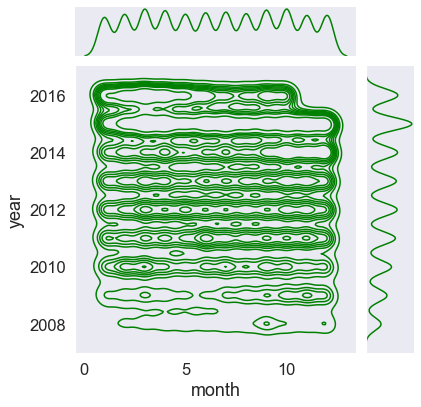

In [11]:
sns_plot = sns.jointplot(df['month'], df['year'], kind='kde', color='green') # март 2015

2. Проанализируйте публикации в месяце из предыдущего вопроса

<AxesSubplot:xlabel='hour'>

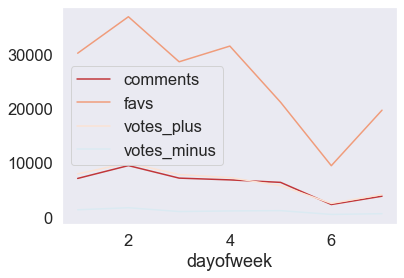

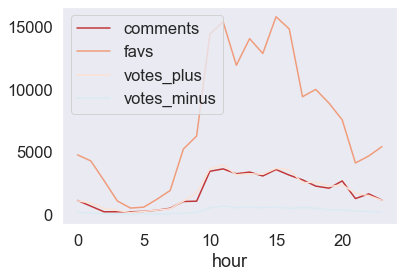

In [12]:
features = ['comments','favs','votes_plus','votes_minus']
data = df[(df['year'] == 2015) & (df['month'] == 3)]
sales_data = data[[x for x in features] + ['dayofweek']]
sales_data.groupby('dayofweek').sum().plot()

features = ['comments','favs','votes_plus','votes_minus']
data = df[(df['year'] == 2015) & (df['month'] == 3)]
sales_data = data[[x for x in features] + ['hour']]
sales_data.groupby('hour').sum().plot()

3. Когда лучше всего публиковать статью?

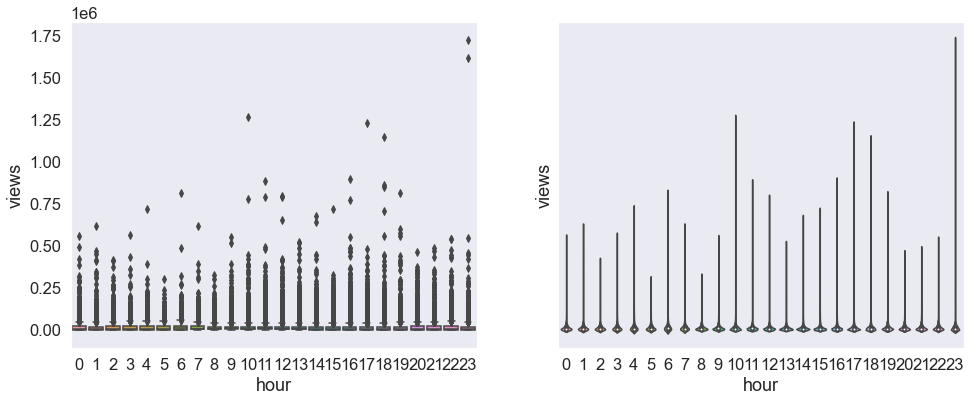

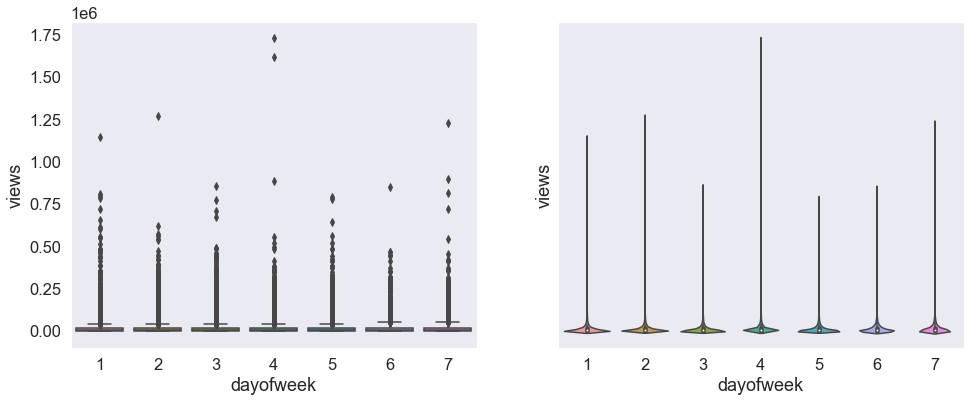

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x='hour', y='views', data=df, ax=axes[0]);
sns.violinplot(x='hour', y='views', data=df, ax=axes[1]);

_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x='dayofweek', y='views', data=df, ax=axes[0]);
sns.violinplot(x='dayofweek', y='views', data=df, ax=axes[1]);

4. Кого из топ-20 авторов чаще всего минусуют?

<AxesSubplot:xlabel='votes_minus', ylabel='author'>

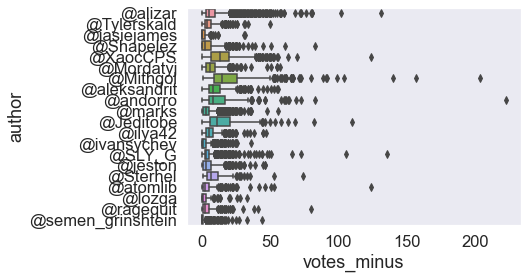

In [14]:
top_authors = df.author.value_counts().sort_values(ascending = False).head(20).index.values
sns.boxplot(y="author", x="votes_minus", data=df[df.author.isin(top_authors)], orient="h")

5. Сравните субботы и понедельники

<AxesSubplot:xlabel='hour'>

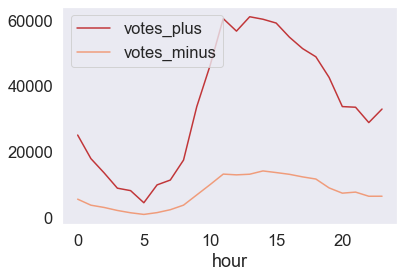

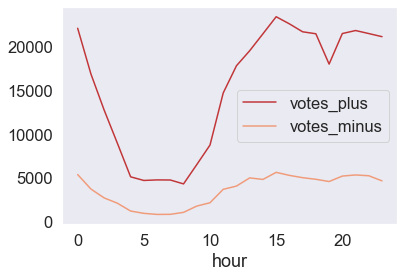

In [15]:
features = ['votes_plus','votes_minus']

monday = df[df['dayofweek'] == 1]
sales_data = monday[[x for x in features] + ['hour']]
sales_data.groupby('hour').sum().plot()

saturday = df[df['dayofweek'] == 6]
sales_data = saturday[[x for x in features] + ['hour']]
sales_data.groupby('hour').sum().plot()

<AxesSubplot:xlabel='hour'>

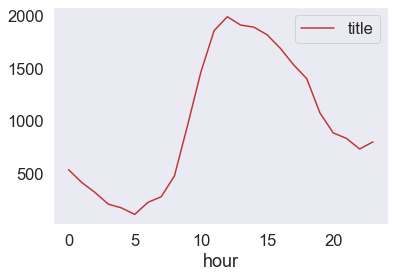

In [16]:
monday = df[df['dayofweek'] == 1]
monday.groupby('hour')[['title']].count().plot()

<AxesSubplot:xlabel='hour'>

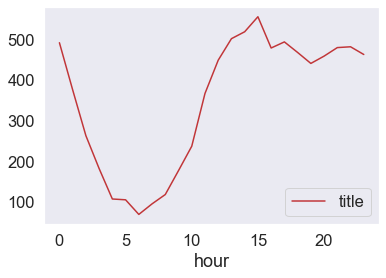

In [17]:
saturday = df[df['dayofweek'] == 6]
saturday.groupby('hour')[['title']].count().plot()